# Interpolation and Integration


In [3]:
import numpy as np
import scipy

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

## Interpolation


Interpolation is the process of defining a function that takes on specified values at specified points. The result function can be useful for table lookup, plotting, numerical differentiation, numerical integration, etc.

The commonly used interpolations include polynomial, piecewise polynomial (such as splines), trignometric, etc. We have seen polynomial interpolation in earlier lectures.

In `scipy`, interpolation is simple and convenient. For 1-D problems, the `interp1d` function, when given arrays describing X and Y data, returns an object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:


In [1]:
import scipy.interpolate as interpolate

In [4]:
def f(x):
    return np.sin(x)


f(0.1)

0.09983341664682815

In [17]:
x = np.linspace(0, 9, 10)  # The points we will be interpolating between
print(x)
y = f(x)
print(y)
# + 0.1*np.random.randn(10)

# Construct interpolation operator using piecewise linear interpolation
linear_interpolation = interpolate.interp1d(x, y, kind="linear")

x_samples = np.linspace(0, 9, 100)  # The points at which we will sample
y_interp1 = linear_interpolation(x_samples)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]


In [15]:
print(linear_interpolation)

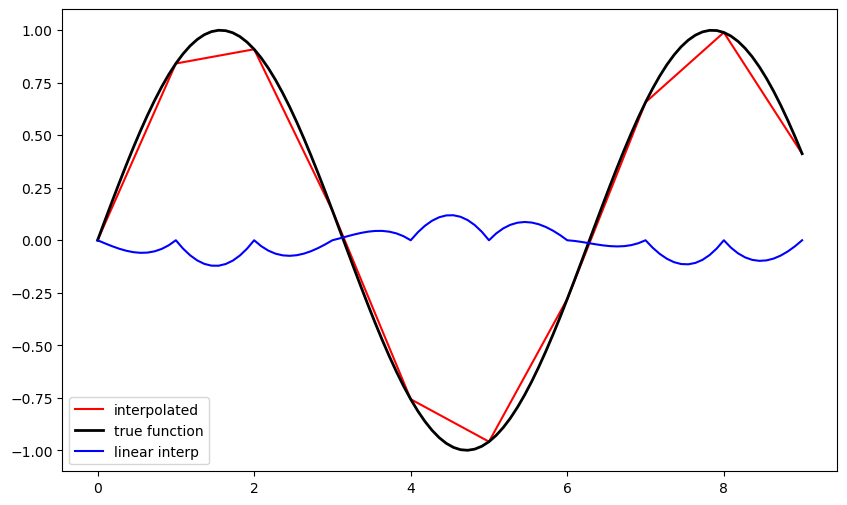

In [20]:
y_real = f(x_samples)  # the exact values

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_samples, y_interp1, 'r-', label='interpolated') # the original data
ax.plot(x_samples, y_real, 'k', lw=2, label='true function')
ax.plot(x_samples, y_interp1 - y_real, "b", label="linear interp")
ax.legend(loc=3)
plt.show()

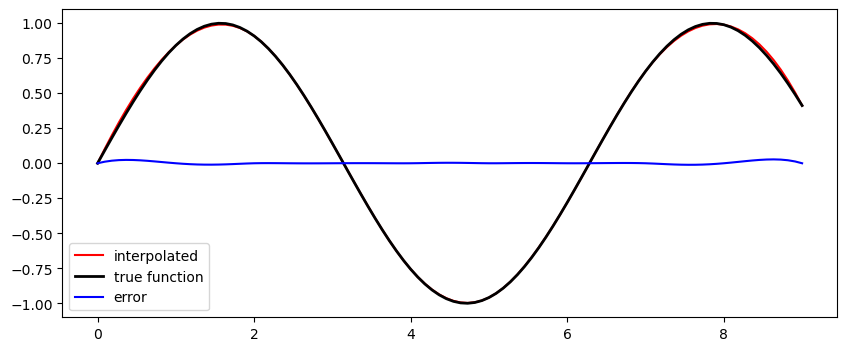

In [22]:
# Construct interpolation operator using piecewise cubic interpolation (cubic splines)
cubic_interpolation = interpolate.interp1d(x, y, kind="cubic")
y_interp2 = cubic_interpolation(x_samples)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_samples, y_interp2, 'r', label='interpolated') # the original data
ax.plot(x_samples, y_real, 'k', lw=2, label='true function')
ax.plot(x_samples, y_interp2 - y_real, "b", label="error")
ax.legend(loc=3)
plt.show()

### Multivariate interpolation

Besides interpolation of scalar functions, we can also perform multivariate interpolation in `scipy`.


### Regular grid

On regular grids in 2-D, we can use the function `RegularGridInterpolator`, which behaves similarly to `interp1d`.


In [26]:
x = y = np.linspace(-2, 2, 10)


def f(x, y):
    return np.exp(-((x + 0.5) ** 2) - 2 * (y + 0.5) ** 2) - np.exp(
        -((x - 0.5) ** 2) - 2 * (y - 0.5) ** 2
    )

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [29]:
from scipy.interpolate import RegularGridInterpolator

f_interp = RegularGridInterpolator((x, y), Z)

In [30]:
# Create fine grid for evaluation
xx = np.linspace(x.min(), x.max(), 100)
yy = np.linspace(y.min(), y.max(), 100)
XX, YY = np.meshgrid(xx, yy)

# Prepare points for interpolation
points = np.vstack([YY.ravel(), XX.ravel()]).T
# Evaluate interpolator at these points
ZZi = f_interp(points)
# Reshape to 2D array
ZZi = ZZi.reshape(XX.shape)

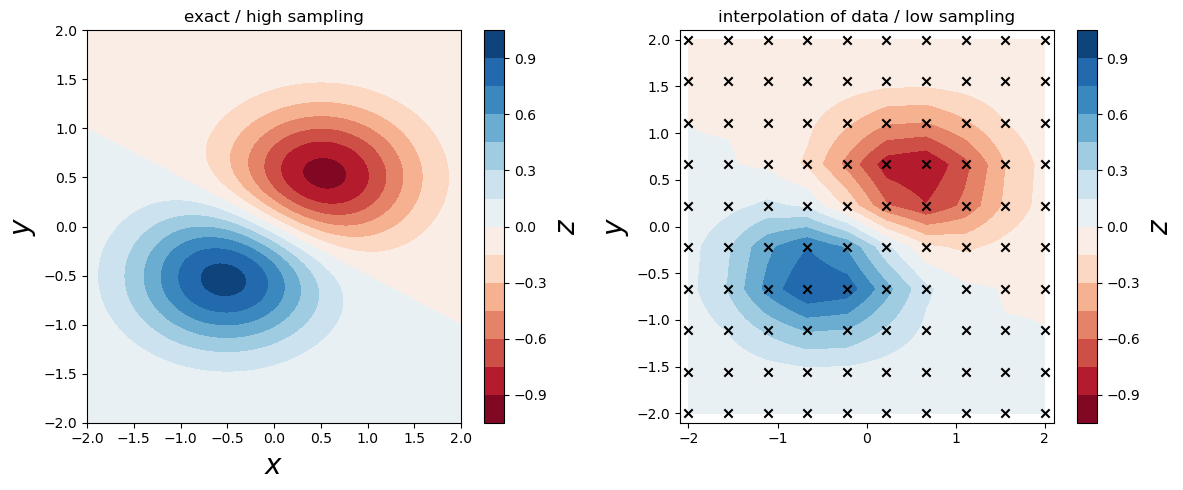

In [31]:
# Plot contours of results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

XX, YY = np.meshgrid(xx, yy)
c = axes[0].contourf(XX, YY, f(XX, YY), 15, cmap=plt.cm.RdBu)
axes[0].set_xlabel(r"$x$", fontsize=20)
axes[0].set_ylabel(r"$y$", fontsize=20)
axes[0].set_title("exact / high sampling")
cb = fig.colorbar(c, ax=axes[0])
cb.set_label(r"$z$", fontsize=20)

c = axes[1].contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1, 2.1)
axes[1].set_xlim(-2.1, 2.1)
axes[1].set_ylabel(r"$y$", fontsize=20)
axes[1].scatter(X, Y, marker="x", color="k")
axes[1].set_title("interpolation of data / low sampling")
cb = fig.colorbar(c, ax=axes[1])
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()
plt.show()

### Irregular grid

We can also interpolate scattered date using the `griddata` function.


Using the same function we used above we sample 500 points at random and evaluate the function at those points


In [32]:
np.random.seed(115925231)
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)

zdata = f(xdata, ydata)

Now we define a function that given vectors `xdata`, `ydata`, and `zdata` holding $z = f(x,y)$ at the $n$ randomly sampled points, computes interpolations using nearest, linear and cubic methods.


In [33]:
def z_interpolate(xdata, ydata, zdata, X, Y):
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method="nearest")
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method="linear")
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method="cubic")
    return Zi_0, Zi_1, Zi_3

Define a uniform mesh we will use for plotting


In [34]:
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

Finally, plot the result of interpolating random data with the number of data points $n=50,150,500$ and with nearest, linear and cubic interpolation.


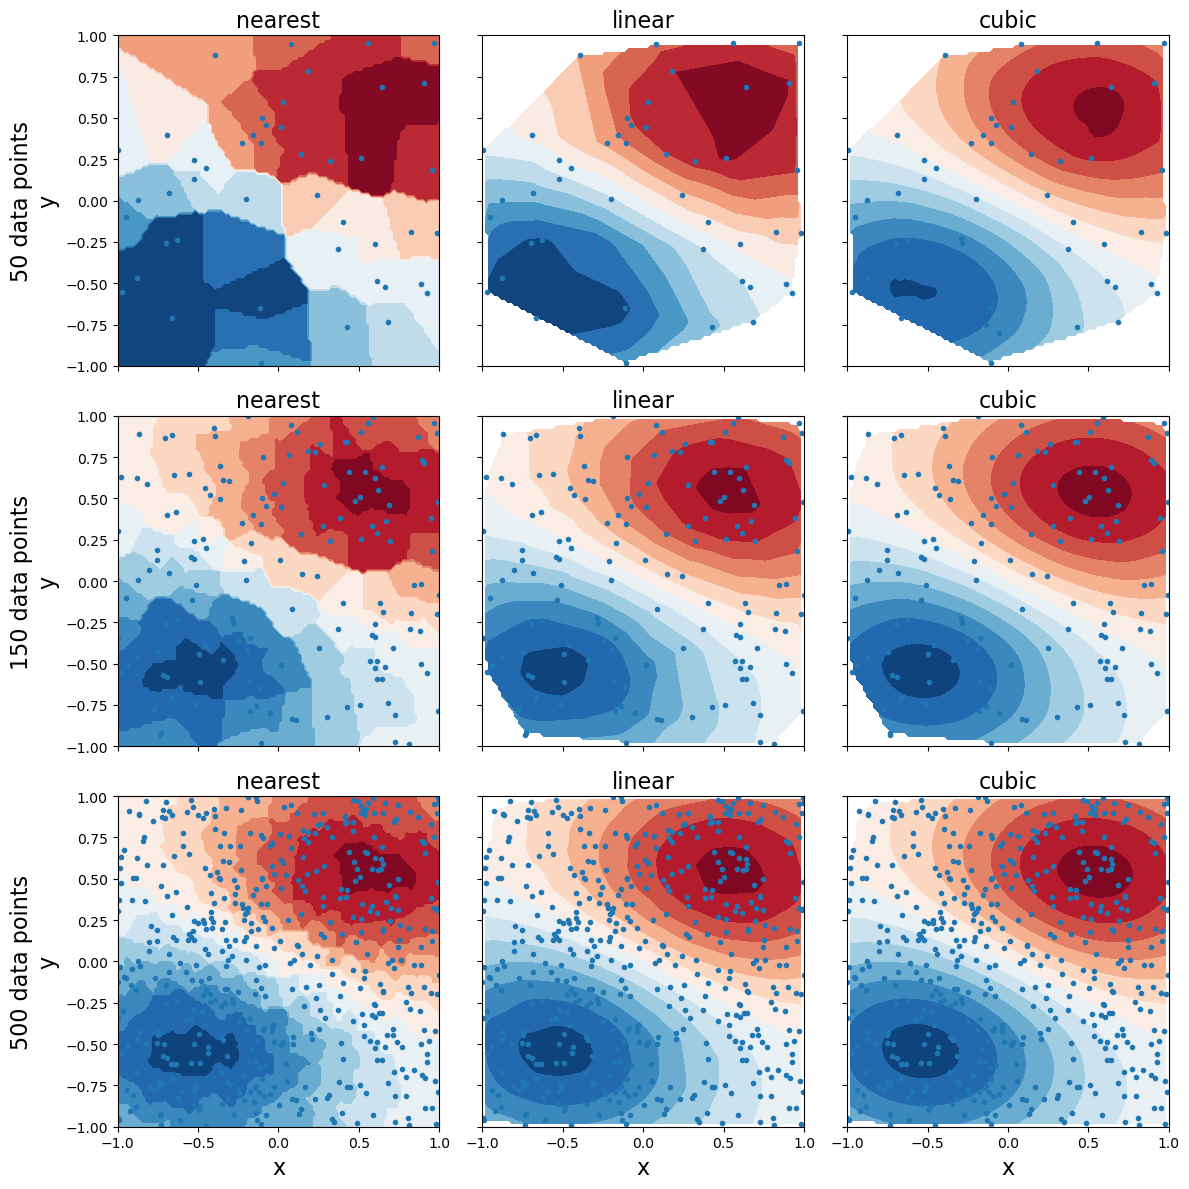

In [35]:
# Make a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

# The 3 values of n
n_vec = [50, 150, 500]

for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n], X, Y)

    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].scatter(xdata[:n], ydata[:n], marker=".")
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
    axes[idx, 0].set_title("nearest", fontsize=16)

    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linear", fontsize=16)
    axes[idx, 1].scatter(xdata[:n], ydata[:n], marker=".")

    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)
    axes[idx, 2].scatter(xdata[:n], ydata[:n], marker=".")

for m in range(len(n_vec)):
    axes[idx, m].set_xlabel("x", fontsize=16)

fig.tight_layout()
plt.show()

## Integration


### Numerical integration: quadrature


Numerical evaluation of a function of the type

$$\displaystyle \int_a^b f(x) dx$$

is called _numerical quadrature_, or simply _quadature_. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.

Integration can be interpreted in many different ways. The most straightforward is the area under a curve.


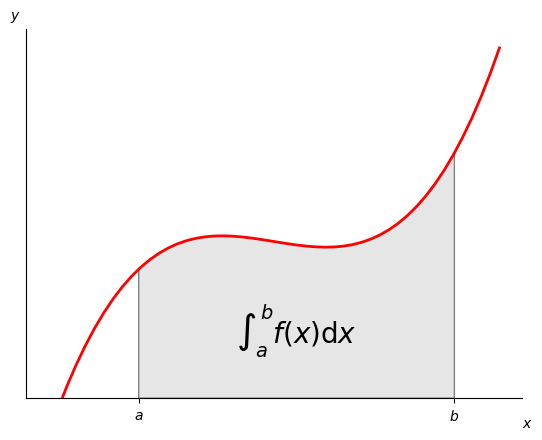

In [36]:
# Adapted from https://matplotlib.org/3.1.1/gallery/showcase/integral.html
from matplotlib.patches import Polygon


def f(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x, y, "r", linewidth=2)
ax.set_ylim(bottom=0)

ix = np.linspace(a, b)
iy = f(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor="0.9", edgecolor="0.5")
ax.add_patch(poly)

ax.text(
    0.5 * (a + b),
    30,
    r"$\int_a^b f(x)\mathrm{d}x$",
    horizontalalignment="center",
    fontsize=20,
)

fig.text(0.9, 0.05, "$x$")
fig.text(0.1, 0.9, "$y$")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_ticks_position("bottom")

ax.set_xticks((a, b))
ax.set_xticklabels(("$a$", "$b$"))
ax.set_yticks([])

plt.show()

The simplest numerical approximation is to divide the region into boxes and add up the areas of each box


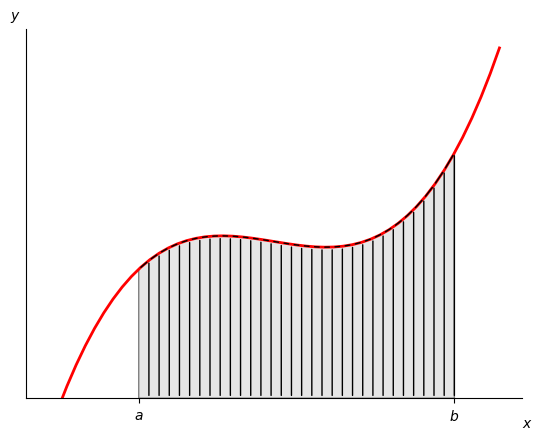

In [37]:
fig, ax = plt.subplots()
ax.plot(x, y, "r", linewidth=2)
ax.set_ylim(bottom=0)
poly = Polygon(verts, facecolor="0.9", edgecolor="0.5")
ax.add_patch(poly)

fig.text(0.9, 0.05, "$x$")
fig.text(0.1, 0.9, "$y$")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_ticks_position("bottom")

ax.set_xticks((a, b))
ax.set_xticklabels(("$a$", "$b$"))
ax.set_yticks([])

npt = 32
xx = np.linspace(a, b, npt)
yy = f(xx)
for i in range(1, npt):
    ax.annotate(
        "",
        xy=(xx[i - 1], yy[i - 1]),
        xycoords="data",
        xytext=(xx[i], yy[i]),
        textcoords="data",
        arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0."),
    )
    ax.annotate(
        "",
        xy=(xx[i], yy[i]),
        xycoords="data",
        xytext=(xx[i], 0),
        textcoords="data",
        arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0."),
    )
plt.show()

In [38]:
# exact answer is 624.75 ... adjust npt to get more accuracy
exact = 624.75
npt = 32
xx = np.linspace(a, b, npt)
yy = f(xx)

area = 0.0
for i in range(1, npt):
    area += 0.5 * (yy[i - 1] + yy[i]) * (xx[i] - xx[i - 1])  # area of each trapezoid
print(area, area - exact)

624.8392299687825 0.08922996878254708


Sympy can evaluate some integrals


In [39]:
import sympy

X = sympy.symbols("X")
print(sympy.integrate((X - 3) * (X - 5) * (X - 7) + 85, X))  # indefinite integral
print(
    sympy.integrate((X - 3) * (X - 5) * (X - 7) + 85, (X, 2.0, 9.0))
)  # definite integral

X**4/4 - 5*X**3 + 71*X**2/2 - 20*X
624.750000000000


Integration can also be regarded as

- The inverse of differentiation (i.e., antiderivative)
- The limit of discrete sum as you get many values in the sum


While the above trapezoid rule for integration is great to understand how things work (and in some settings can be very accurate) there are many more powerful techniques for numerical integration.


In [42]:
import scipy.integrate as integrate

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function.


The basic usage is as follows:


In [47]:
# define a simple function for the integrand
def f(x):
    return (x - 3) * (x - 5) * (x - 7) + 85
    # return x**7

In [49]:
x_lower = 2  # the lower limit of x
x_upper = 9  # the upper limit of x

val, abserr = integrate.quad(f, x_lower, x_upper)

print("integral value =", val, ", absolute error =", abserr)

integral value = 624.7499999999999 , absolute error = 6.936118346345664e-12


If we need to pass extra arguments to integrand function we can use the `args` keyword argument:


In [ ]:
# calculate an integral over the Bessel function of order 3


def integrand(x, n):
    """
    Bessel function of first kind and order n. Note it takes an additional argument n.
    """
    return scipy.special.jn(
        n, x
    )  # since n is the first argument we have to wrap it another function


x_lower = 0  # the lower limit of x
x_upper = 10  # the upper limit of x

val, abserr = integrate.quad(integrand, x_lower, x_upper, args=(3,))

xplot = np.linspace(x_lower, x_upper, 50)
plt.plot(xplot, scipy.special.jn(3, xplot))
plt.show()

print("value", val, "    abserr", abserr)

For simple functions we can use a lambda function (anonymous function) instead of explicitly defining a function for the integrand:


In [ ]:
val, abserr = integrate.quad(
    lambda x, n: scipy.special.jn(n, x), x_lower, x_upper, args=(3,)
)
print(val, abserr)

In [ ]:
val, abserr = integrate.quad(lambda x: np.exp(-(x**2)), -np.Inf, np.Inf)

print("numerical  =", val, abserr)

analytical = np.sqrt(np.pi)
print("analytical =", analytical)

As show in the example above, we can also use `np.Inf` or `-np.Inf` as integral limits.


**Example:** We are told that the probability that someone's is height $h\ge0$ (in feet) is given by the function $\rho(h)$ (see below). For safety reasons, your organization only hires people who are taller than 4 feet and shorter than 6.5 feet.

- What is the average height of the people you are hiring?
- I.e., evaluate this ratio.
  $$
  <h> = \frac{\int_4^{6.5} h \rho(h) dh}{\int_4^{6.5} \rho(h) dh}
  $$
  \[The integral on the bottom is the fraction of the entire population that have height in the required range. \]


In [ ]:
# This plots the probability distribution
import math


def rho(h):
    return h * math.exp(-((h - 5) ** 2)) / 8.86226925452771


x = np.linspace(0, 10, 50)
y = np.array([rho(x[i]) for i in range(len(x))])
plt.plot(x, y)
plt.show()

In [ ]:
def hrho(h):
    return h * rho(h)

In [ ]:
# The correct answer is about 5.147
denom, err = integrate.quad(rho, 4, 6.5)
numer, err = integrate.quad(lambda h: h * rho(h), 4, 6.5)
print(denom, err)
print(numer, err)
print("ratio", numer / denom)

Higher-dimensional integration works in a similar way:


In [ ]:
def integrand(x, y):
    return np.exp(-(x**2) - y**2)


x_lower = 0
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = integrate.dblquad(
    integrand, x_lower, x_upper, lambda x: y_lower, lambda x: y_upper
)

print(val, abserr)

Note how we had to pass lambda functions for the limits for the y integration, since these in general can be functions of x.


## Ordinary differential equations (ODEs)

Differential equations form the basis of mathematical models in a wide range of fields – from engineering and physical sciences to finance and biological sciences. Differential equations are relations between unknown functions and their derivatives. Computing numerical solutions to differential equations is one of the most important tasks in numerical computing.

If you are not so interested in differential equations, this will be brief. Just focus on the Python and ignore the math.


SciPy provides two different ways to solve ODEs: An API based on the function `odeint`, and object-oriented API based on the class `ode`. Usually `odeint` is easier to get started with, but the `ode` class offers some finer level of control.

Here we will use the `odeint` functions. For more information about the class `ode`, try `help(ode)`. It does pretty much the same thing as `odeint`, but in an object-oriented fashion.

To use `odeint`, first import it from the `scipy.integrate` module


In [ ]:
import scipy.integrate as integrate

A system of ODEs are usually formulated in standard form before it is attacked numerically. The standard form is:

$$y' = f(y, t)$$

where $y$ is a vector of functions of the variable $t$ (which we can interpret as time)

$$y = [y_1(t), y_2(t), ..., y_n(t)]$$

and $f$ is some function that gives the derivatives of the function $y_i(t)$. To solve an ODE we need to know the function $f$ and an initial condition, $y(0)$.

Note that higher-order ODEs can always be written in this form by introducing new variables for the intermediate derivatives.

Once we have defined the Python function `f` and array `y_0` (that is $f$ and $y(0)$ in the mathematical formulation), we can use the `odeint` function as:

    y_t = odeint(f, y_0, t)

where `t` is an array with time-coordinates for which to solve the ODE problem. `y_t` is an array with one row for each point in time in `t`, where each column corresponds to a solution `y_i(t)` at that point in time.

We will see how we can implement `f` and `y_0` in Python code in the examples below.


**Example:** Single species chemical reaction (or radioactive decay, or bacterial death, ...)

We start at time $t=0$ with a concentration $c_A(0)=1$ of molecule $A$ that spontaneously reacts to produce molecule $B$ (with starting concentration $c_B(0)=0$). The reaction rate constant is $b$. I.e.,

$$
 \frac{dc_A}{dt} = - b c_A
$$

\[Since the concentration of $B$ grows 1:1 as the concentration of $A$ shrinks you can see that $c_B(t) = c_A(0) - c_A(t)$. You can also see that the equation for $c_A$ does not depend upon $c_B$. So we only need to solve for $c_A$.\]

The exact solution is $c_A(t) = c_A(0) e^{-bt}$


In [ ]:
b = 0.2
ca0 = 1.0


def dcAdt(cA, t):
    """Given cA at time t return dcA/dt"""
    return -b * cA


def exact(t):
    return cA0 * np.exp(-b * t)


t = np.linspace(0, 30, 20)
cA0 = np.array([ca0])
cA = integrate.odeint(dcAdt, cA0, t)
# print(cA)
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(t, cA[:, 0], "*", label="numerical")
ax.plot(t, exact(t), "k", label="exact")
ax.legend()
plt.show()

**Example:** Just a little more complicated. In addition to A reacting to make B, B can react to make A, but with a different rate.

$$
\begin{aligned}
\frac{dc_A}{dt} = -ac_A + bc_B \\
\frac{dc_B}{dt} = -bc_B + ac_A \\
\end{aligned}
$$

What is the ratio of the concentrations of A and B at equilibrim (long time)? Start with $c_A(0)=1$ and $c_B(0)=0$ and assume that $t=50$ is sufficiently long to reach equilibrium.

The exact answer is $b/a$.

\[Aside: this topic of chemical equilibria is very important, for instance in global warming, or in the multi-trillion dollar petrochemical industry.\]


In [ ]:
a = 0.2
b = 0.1
ca0 = 1
cb0 = 0


def dcAdt(c, t):
    cA, cB = c[0], c[1]
    return np.array([-a * cA + b * cB, -b * cB + a * cA])


t = np.linspace(0, 50, 20)
c0 = np.array([ca0, cb0])
c = integrate.odeint(dcAdt, c0, t)
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(t, c[:, 0], "-*", label="a")
ax.plot(t, c[:, 1], "-*", label="b")

ax.legend()
plt.show()
print(c[-1, 0] / c[-1, 1])

**Example:** Growth of algae in contaminated ecosystem.

\[This is adapted from a class project of two students from Ecology and Evolution --- they had not done any differential equations before this class and were exploring some literature models they had previously been unable to reproduce.\]

Algae ($A$) in a pond need food ($F$), oxygen ($O$) and nitrogen ($N$) to grow. But too much nutrients can cause the population to explode --- an [algal bloom](https://en.wikipedia.org/wiki/Algal_bloom).

Our simple model uses these coupled differential equations

$$
\begin{aligned}
\frac{dA}{dt} = a N O F - d \\
\frac{dN}{dt} = - b N A + c \\
\frac{dO}{dt} = - b O A + e \\
\frac{dF}{dt} = - b F A + f
\end{aligned}
$$

where, $d$ represents the death rate of the algae, $c, e, f$ represent the natural production rate of nitrogen, oxgen, and food, respectively, and $a$ is the rate at which the algae grow dependent upon the available nutriens, and $b$ is the rate at which the nutrients are consumed.


In [ ]:
a = 1
b = 0.1
c = 0.2
d = 0.5
e = 0.1
f = 0.3
A0 = 0.0
N0 = 0.8
O0 = 1.0
F0 = 0.5


def dx(x, t):
    A, N, O, F = x[0], x[1], x[2], x[3]
    dA = a * N * O * F - d
    dN = -b * N * A + c
    dO = -b * O * A + e
    dF = -b * F * A + f
    return np.array([dA, dN, dO, dF])


t = np.linspace(0, 50, 250)
x0 = np.array([A0, N0, O0, F0])
x = integrate.odeint(dx, x0, t)
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel("t")
ax.set_ylabel("population or concentration")
ax.plot(t, x[:, 0], "k", label="Algae")
ax.plot(t, x[:, 1], "g", label="Nitrogen")
ax.plot(t, x[:, 2], "r", label="Oxygen")
ax.plot(t, x[:, 3], "b", label="Nitrogen")
ax.legend(loc="upper right")
plt.show()

Interesting dynamics! Initial surge in growth (a bloom!) followed by a population crash, then a rebound, etc., with eventual convergence to a steady state population.


#### Example: double pendulum

We won't go through this in class. It is provided for those interested in a more complex example and it also illustrates some really cool dynamics.


Let's consider a physical example: The double compound pendulum, described in some detail here: http://en.wikipedia.org/wiki/Double_pendulum


<img src="https://upload.wikimedia.org/wikipedia/commons/4/45/Double-compound-pendulum.gif">


The equations of motion of the pendulum are given on the wiki page:
<img src="http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg">

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

To make the Python code simpler to follow, let's introduce new variable names and the vector notation: $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$


In [ ]:
g = 9.82
L = 0.5
m = 0.1


def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]

    dx1 = (
        6.0
        / (m * L**2)
        * (2 * x3 - 3 * np.cos(x1 - x2) * x4)
        / (16 - 9 * np.cos(x1 - x2) ** 2)
    )
    dx2 = (
        6.0
        / (m * L**2)
        * (8 * x4 - 3 * np.cos(x1 - x2) * x3)
        / (16 - 9 * np.cos(x1 - x2) ** 2)
    )
    dx3 = -0.5 * m * L**2 * (dx1 * dx2 * np.sin(x1 - x2) + 3 * (g / L) * np.sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * np.sin(x1 - x2) + (g / L) * np.sin(x2))

    return [dx1, dx2, dx3, dx4]

In [ ]:
# choose an initial state
x0 = [np.pi / 4, np.pi / 2, 0, 0]

In [ ]:
# time coordinate to solve the ODE for: from 0 to 10 seconds
t = np.linspace(0, 10, 250)

In [ ]:
# solve the ODE problem
x = integrate.odeint(dx, x0, t)

In [ ]:
x.shape

In [ ]:
# plot the angles as a function of time

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(t, x[:, 0], "r", label="theta1")
axes[0].plot(t, x[:, 1], "b", label="theta2")

x1 = +L * np.sin(x[:, 0])
y1 = -L * np.cos(x[:, 0])

x2 = x1 + L * np.sin(x[:, 1])
y2 = y1 - L * np.cos(x[:, 1])

axes[1].plot(x1, y1, "r", label="pendulum1")
axes[1].plot(x2, y2, "b", label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1])
plt.show()

## Further reading

- Interpolation: Chapter 7 of Numerical Python book
- Integration: Chapter 8 of Numerical Python book
- Ordinary differential equations: Chapter 9 of Numerical Python book


## Acknowledgements

Adapted from J.R. Johansson's Scientific Python Lectures available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).
